# Loading Data & Processing

## importing pkgs

In [33]:
## importing pkg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow
import sklearn
sns.set()

## Data loading

In [34]:
# ML_DSC_cell
# ====== data loading ====== #
#magic('%reset -sf')

data_files = ['group-a-1.xlsx', 'group-a-2.xlsx', 'group-a-3.xlsx','group-a-4.xlsx',
              'group-b-1.xlsx', 'group-b-2.xlsx', 'group-b-3.xlsx', 'group-b-4.xlsx',
              'group-c-1.xlsx', 'group-c-2.xlsx', 'group-c-3.xlsx', 'group-c-4.xlsx',
              'group-d-1.xlsx', 'group-d-2.xlsx', 'group-d-3.xlsx', 'group-d-4.xlsx']
n_df = len(data_files)

data_files_mg = ['Group-A-1s-0.3r-mg.csv','Group-A-1s-0.5r-mg.csv','Group-A-1s-0.6r-mg.csv','Group-A-1s-1r-mg.csv',
                'Group-B-0.6s-0.3r-mg.csv','Group-B-0.6s-0.5r-mg.csv','Group-B-0.6s-0.6r-mg.csv','Group-B-0.6s-1r-mg.csv',
                'Group-C-0.5s-0.3r-mg.csv','Group-C-0.5s-0.5r-mg.csv','Group-C-0.5s-0.6r-mg.csv','Group-C-0.5s-1r-mg.csv',
                'Group-D-0.3s-0.3r-mg.csv','Group-D-0.3s-0.5r-mg.csv','Group-D-0.3s-0.6r-mg.csv','Group-D-0.3s-1r-mg.csv']



In [35]:
cp_data_mg = pd.read_csv('data/mgma-gd-group.csv')

cp_data_mg.columns=['T','z0l','zl','z0','zu','z0u']
cp_data_mg_gd_z0 = cp_data_mg.iloc[:,3]


## Data appending and wrangling

In [36]:

df_frames = []
for n_df in range(0,n_df):
    df_name = 'df_' + str(n_df+1)
    df_n = pd.read_excel('data/' + data_files[n_df]) #'/content/drive/MyDrive/colab_nb/ml_dsc_cell' +
    df_m = pd.read_csv('data/' + data_files_mg[n_df])
    df_o = cp_data_mg_gd_z0
    df_nmo = pd.concat([df_n, df_m.iloc[:,1:6],df_o], axis=1, ignore_index=True)
    df_nmo.columns=['Temp','Cp-1','Cp-2','Cp-3','Cp-4','Cp-5','Cp-6','Cp-7','Cp-8','r','s','z0l','zl','z0','zu','z0u','z0_gd']
    df_frames.append(df_nmo)
    df = pd.concat(df_frames, axis=0, ignore_index=True)
    df_out = df.to_csv('data/all_data.csv')
    
    df.head()

# Feature Engineering

In [37]:
# Data check

cp_data = pd.read_csv('data/all_data.csv')

cp_data['Temp[K]'] = cp_data['Temp'] + 273.15

cp_data = cp_data.drop(['z0l', 'zl','z0','zu','z0u', 'Temp'], axis=1)
cp_data = cp_data.drop(columns=cp_data.columns[0], axis=1)
cp_data.head()

,Cp-1,Cp-2,Cp-3,Cp-4,Cp-5,Cp-6,Cp-7,Cp-8,r,s,z0_gd,Temp[K]
0,1.269789,1.309680,1.312751,1.270857,1.277475,1.278631,1.278492,1.278955,0.3,1.0,1.343676,294.15
1,1.271276,1.310518,1.314484,1.271888,1.278841,1.279217,1.279715,1.279762,0.3,1.0,1.345330,295.15
2,1.272570,1.312047,1.315948,1.273368,1.280174,1.280551,1.280826,1.281637,0.3,1.0,1.346649,296.15
3,1.274185,1.312721,1.317608,1.274906,1.281786,1.282042,1.282349,1.282962,0.3,1.0,1.348169,297.15
4,1.275536,1.312587,1.318696,1.276110,1.283152,1.283313,1.283771,1.284211,0.3,1.0,1.349595,298.15


## Data cleaning and rearranging at 298K

In [38]:

# keeping only data at room temperature 298K
q = 298.15
cp_data_rt1 = cp_data[cp_data['Temp[K]']<=q]
cp_data_rt = cp_data_rt1[cp_data_rt1['Temp[K]']>=q]

cp_data_rt = cp_data_rt.drop('Temp[K]', axis=1)
cp_data_rt = cp_data_rt.reset_index(drop=True)
cp_data_rt = np.round(cp_data_rt,2)
cp_data_rt

,Cp-1,Cp-2,Cp-3,Cp-4,Cp-5,Cp-6,Cp-7,Cp-8,r,s,z0_gd
0,1.28,1.31,1.32,1.28,1.28,1.28,1.28,1.28,0.3,1.0,1.35
1,1.31,1.32,1.32,1.32,1.32,1.33,1.33,1.33,0.5,1.0,1.35
2,1.33,1.33,1.33,1.33,1.33,1.34,1.34,1.34,0.6,1.0,1.35
3,1.35,1.35,1.35,1.35,1.36,1.35,1.35,1.35,1.0,1.0,1.35
4,1.27,1.27,1.27,1.27,1.27,1.27,1.27,1.27,1.0,0.6,1.35
5,1.30,1.31,1.31,1.31,1.30,1.31,1.31,1.31,0.6,0.6,1.35
6,1.32,1.32,1.32,1.32,1.32,1.32,1.32,1.32,0.5,0.6,1.35
7,1.34,1.34,1.34,1.34,1.34,1.34,1.34,1.34,0.3,0.6,1.35
8,1.27,1.27,1.27,1.27,1.27,1.27,1.27,1.27,1.0,0.5,1.35
9,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,0.6,0.5,1.35


In [39]:
cp_only = cp_data_rt.iloc[:,0:8]
cp_one_clm = pd.Series(cp_only.values.ravel('F'))
cp_one_clm = pd.DataFrame(cp_one_clm)
cp_st_err = (cp_one_clm / cp_data_rt.iloc[1,-1]) # selecting value from z0_gd
cp_rt_data = pd.concat([cp_one_clm,cp_st_err], axis=1, ignore_index=True)
cp_rt_data.head()

,0,1
0,1.28,0.948148
1,1.31,0.970370
2,1.33,0.985185
3,1.35,1.000000
4,1.27,0.940741


In [40]:
# calculating the error due to reference volume
count = np.size(cp_rt_data[0])
cp_ref_err_frame = []
for i in range(0, count, 4):
    cp_fourth_ref_value = cp_rt_data.iloc[i+3,1]
    #print(i, cp_fourth_ref_value)
    cp_ref_group = cp_rt_data.iloc[i:i+4,1]
    #print(cp_ref_group)
    cp_ref_err_group = cp_ref_group / cp_fourth_ref_value
    cp_ref_err_group_df = pd.DataFrame(cp_ref_err_group)
    cp_ref_err_frame.append(cp_ref_err_group_df)
    cp_ref_err = pd.concat(cp_ref_err_frame, axis=0, ignore_index=True)
    #print(cp_ref_err_frame)
cp_ref_err

,1
0,0.948148
1,0.970370
2,0.985185
3,1.000000
4,0.947761
5,0.970149
6,0.985075
7,1.000000
8,0.947761
9,0.977612


In [41]:
cp_sam_err = cp_rt_data.iloc[:,1] - cp_ref_err

In [42]:
cp_sam_err_cl = cp_sam_err.iloc[:,1]
cp_sam_err_cl

0      0.022222
1      0.000000
2     -0.014815
3     -0.029630
4      0.022609
5      0.000221
6     -0.014704
7     -0.029630
8      0.022609
9     -0.007242
10    -0.014704
11    -0.029630
12     0.022222
13    -0.007407
14    -0.014815
15    -0.029630
16     0.000000
17    -0.007407
18    -0.014815
19    -0.029630
20     0.022609
21    -0.007242
22    -0.014704
23    -0.029630
24     0.022609
25    -0.007242
26    -0.014704
27    -0.029630
28     0.022222
29    -0.007407
30    -0.029630
31    -0.029630
32    -0.007407
33    -0.007407
34    -0.014815
35    -0.029630
36     0.022609
37    -0.007242
38    -0.014704
39    -0.029630
40     0.022609
41    -0.007242
42    -0.014704
43    -0.029630
44     0.022222
45    -0.007407
46    -0.014815
47    -0.029630
48     0.022222
49    -0.007407
50    -0.014815
51    -0.029630
52     0.022609
53    -0.007242
54    -0.014704
55    -0.029630
56     0.022609
57    -0.007242
58    -0.014704
59    -0.029630
60     0.022222
61    -0.007407
62    -0

In [43]:
## appending r and s columns
r_clm = cp_data_rt['r']
all_r_clm = pd.concat([r_clm, r_clm, r_clm, r_clm,r_clm, r_clm, r_clm, r_clm,],axis=0,ignore_index=True)

s_clm= cp_data_rt['s']
all_s_clm = pd.concat([s_clm, s_clm, s_clm, s_clm,s_clm, s_clm, s_clm, s_clm,],axis=0,ignore_index=True)

## Cean Data Checkpoin

In [44]:
# adding all columns
cp_rt_data1 = pd.concat([cp_rt_data,cp_ref_err, cp_sam_err_cl, all_r_clm, all_s_clm], axis = 1, ignore_index=True)
cp_rt_data1.columns = ['Cp','St(%)', 'R(%)', 'S(%)','Ref','Sam']
cp_clean_data = cp_rt_data1.copy() #DATA CHECKPOINT!

In [45]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [65]:
R=cp_clean_data['Ref']
S=cp_clean_data['Sam']

cp_clean_data['vol_rel'] = ((R+S) / (S))
cp_clean_data = cp_clean_data.sort_values('St(%)')
cp_clean_data = cp_clean_data.reset_index(drop=True)
cp_clean_data=np.round(cp_clean_data,2)
cp_clean_data

,Cp,St(%),R(%),S(%),Ref,Sam,vol_rel,1.67,2.,3.33,0.09,0.6,0.72,0.25,0.5,1.2,0.36,0.83,0.42,0.18,0.15,0.3,1.
0,1.27,0.94,0.95,0.02,1.0,0.5,4.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.27,0.94,0.95,0.02,1.0,0.5,4.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1.27,0.94,0.95,0.02,1.0,0.5,4.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.27,0.94,0.95,0.02,1.0,0.5,4.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1.27,0.94,0.95,0.02,1.0,0.6,3.33,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1.27,0.94,0.95,0.02,1.0,0.6,3.33,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,1.27,0.94,0.95,0.02,1.0,0.6,3.33,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,1.27,0.94,0.95,0.02,1.0,0.5,4.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,1.27,0.94,0.95,0.02,1.0,0.5,4.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1.27,0.94,0.95,0.02,1.0,0.6,3.33,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [66]:
pd.unique(cp_clean_data['vol_rel'])

array([4.  , 3.33, 6.67, 0.6 , 2.  , 2.4 , 1.  , 1.67, 1.2 ])

In [67]:
len(pd.unique(cp_clean_data['vol_rel']))

9

In [49]:
# adding dummies for st-total error
dummies_clm = pd.get_dummies(cp_clean_data['vol_rel'])


In [50]:
cp_clean_data = pd.concat([cp_clean_data,dummies_clm], axis=1, ignore_index=True)

cp_clean_data.columns = ['Cp','St(%)', 'R(%)', 'S(%)', 'Ref','Sam', 'vol_rel','1.67', '2.'  , '3.33', '0.09', '0.6' , '0.72', '0.25', '0.5' , '1.2' , '0.36', '0.83', '0.42', '0.18', '0.15', '0.3' , '1.']
cp_clean_data

,Cp,St(%),R(%),S(%),Ref,Sam,vol_rel,1.67,2.,3.33,0.09,0.6,0.72,0.25,0.5,1.2,0.36,0.83,0.42,0.18,0.15,0.3,1.
0,1.27,0.94,0.95,0.02,1.0,0.5,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.27,0.94,0.95,0.02,1.0,0.6,1.67,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.27,0.94,0.95,0.02,1.0,0.5,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.27,0.94,0.95,0.02,1.0,0.6,1.67,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1.27,0.94,0.95,0.02,1.0,0.6,1.67,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1.27,0.94,0.95,0.02,1.0,0.6,1.67,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,1.27,0.94,0.95,0.02,1.0,0.6,1.67,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,1.27,0.94,0.95,0.02,1.0,0.5,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,1.27,0.94,0.95,0.02,1.0,0.5,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1.27,0.94,0.95,0.02,1.0,0.6,1.67,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
corr_matrix = cp_clean_data.corr()
corr_matrix["St(%)"].sort_values(ascending=False)


St(%)      1.000000
Cp         0.993531
R(%)       0.958241
0.42       0.340021
0.6        0.323485
0.83       0.207733
0.72       0.191197
2.         0.191197
3.33       0.191197
Sam        0.095770
0.09       0.091981
0.25       0.058909
0.5        0.058909
0.18       0.058909
0.36      -0.073378
1.2       -0.106450
1.67      -0.255274
1.        -0.337954
0.3       -0.470242
0.15      -0.470242
Ref       -0.524379
vol_rel   -0.610846
S(%)      -0.939400
Name: St(%), dtype: float64

/tmp/ipykernel_3562947/3765321584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp_clean_data['St(%)'])


<AxesSubplot: xlabel='St(%)', ylabel='Density'>

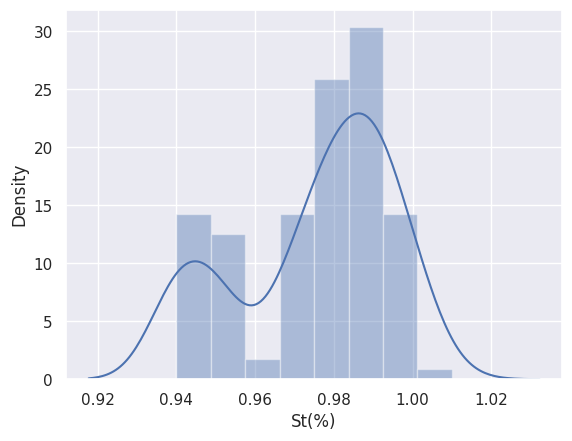

In [52]:
sns.distplot(cp_clean_data['St(%)'])

/tmp/ipykernel_3562947/2488532835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp_clean_data['vol_rel'])


<AxesSubplot: xlabel='vol_rel', ylabel='Density'>

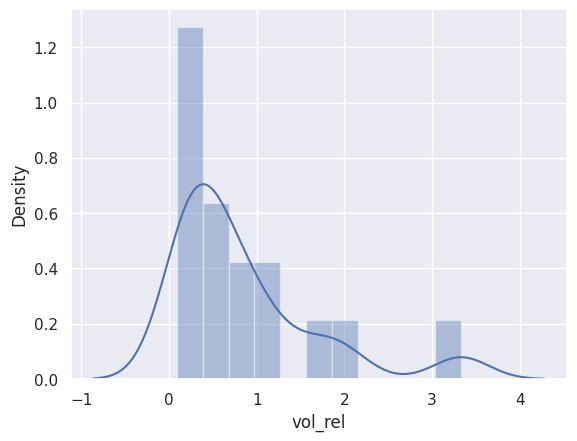

In [53]:
sns.distplot(cp_clean_data['vol_rel'])

##Checking the assumptions!

/tmp/ipykernel_3562947/17860073.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="vol_rel", alpha=0.3,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
/home/parmar/Documents/Nirmal-PhD/dl_dsc_cell/microDSC_error_prediction_ANN/.venv/lib64/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


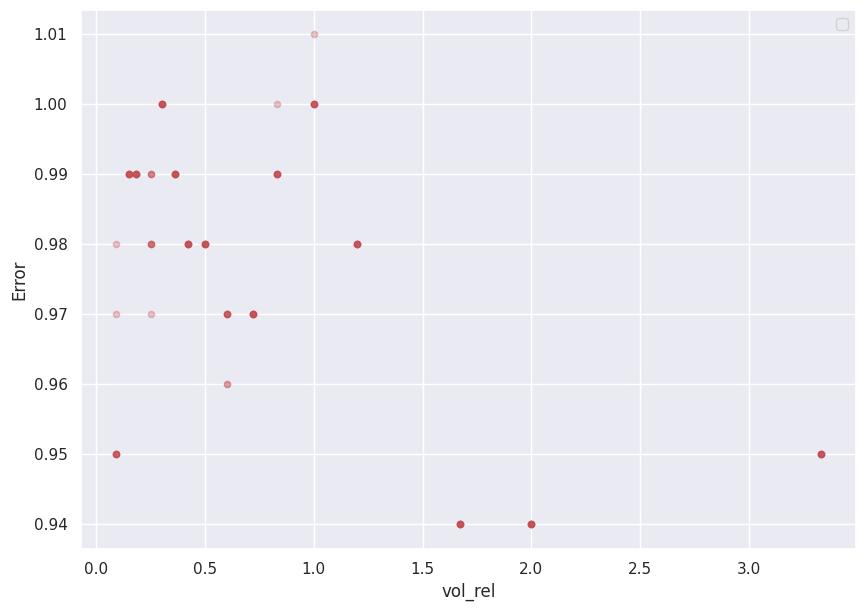

In [64]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="vol_rel", alpha=0.3,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')

ax1.set_xlabel("vol_rel")
ax1.set_ylabel("Error")
plt.legend()


/tmp/ipykernel_3562947/930513793.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Sam", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


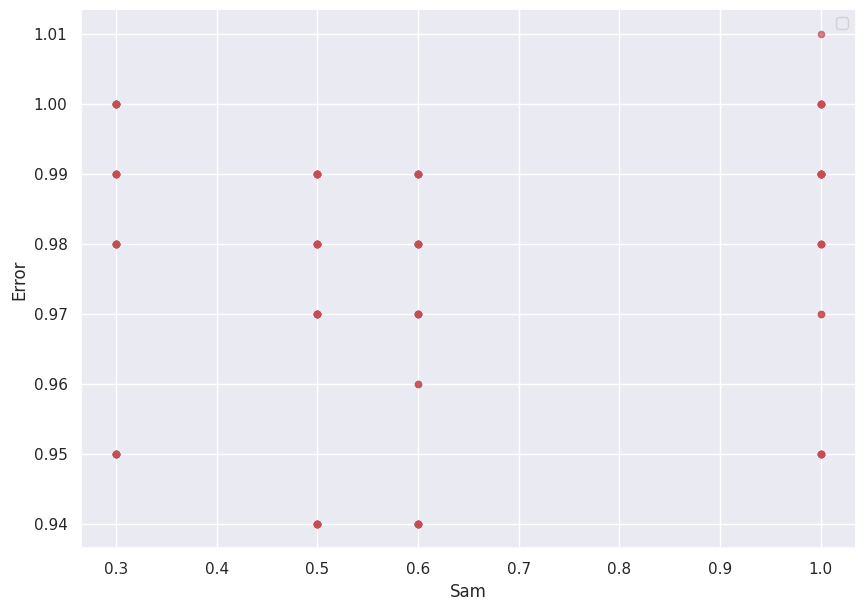

In [55]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Sam", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("Sam")
ax1.set_ylabel("Error")
plt.legend()


/tmp/ipykernel_3562947/1676528209.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Ref", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


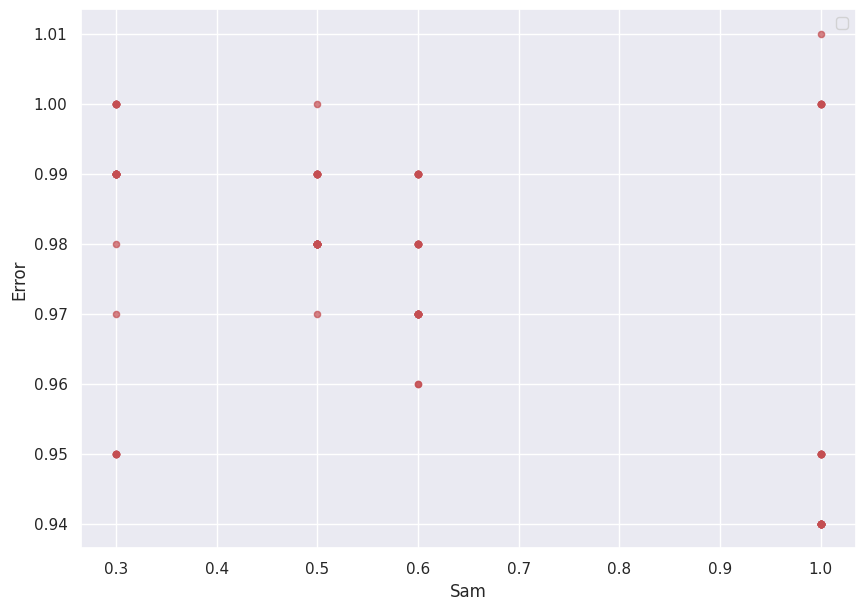

In [56]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Ref", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("Sam")
ax1.set_ylabel("Error")
plt.legend()


# Train Test & Target Data

In [57]:
# target data

target = cp_clean_data['St(%)']
vol_data = cp_clean_data[['Ref','Sam','vol_rel','1.67', '2.' , '3.33', '0.09', '0.6' , '0.72', '0.25', '0.5' , '1.2' , '0.36', '0.83', '0.42', '0.18', '0.15', '0.3' , '1.']]


In [58]:
from sklearn.model_selection import train_test_split 
vol_train, vol_test, target_train, target_test = train_test_split(vol_data, target, test_size=0.1, random_state= 42)

In [59]:
inputs = vol_data.copy() # making another copy of data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_inputs = scaler.fit_transform(inputs)

In [60]:
# spliting data
from sklearn.model_selection import train_test_split
data_train, data_test_val, targets_train, target_test_val = train_test_split(scaled_inputs, target, test_size=0.2, random_state=42)


In [61]:
# splitting data in test and validation sets
data_test, data_validation, target_test, target_validation = train_test_split(data_test_val, target_test_val, test_size=0.5) 

## saving train, test and validation data in npz

In [62]:
np.savez('data_train', input=data_train, targets=targets_train)
np.savez('data_validation', input=data_validation, targets=target_validation)
np.savez('data_test', input=data_test, targets=target_test)

## Deploying scaler pkl




In [63]:
import joblib
joblib.dump(scaler,'scaler.pkl') #scaler for standarlisation model pkl

['scaler.pkl']